Sprial

In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import plotly.graph_objects as go
import os
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
from sklearn.model_selection import train_test_split

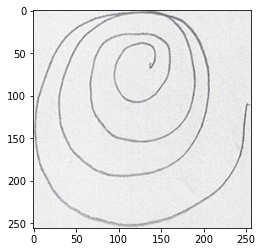

In [293]:
img_healthy = plt.imread('full/V04HE03.png')
plt.imshow(img_healthy)

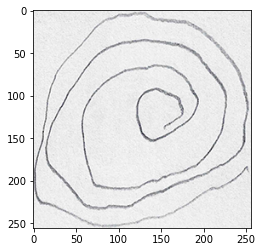

In [294]:
img_patient = plt.imread('full/V09PE02.png')
plt.imshow(img_patient)

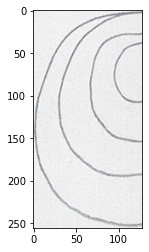

In [295]:
plt.imshow(img_healthy[:,0:128,:])

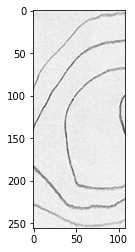

In [296]:
plt.imshow(img_patient[:,20:128,:])

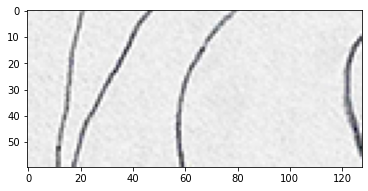

In [297]:
plt.imshow(img_patient[90:150,:128,:])

In [298]:
img_patient[90:150,128,0]

array([0.90588236, 0.9254902 , 0.9137255 , 0.9137255 , 0.9490196 ,
       0.94509804, 0.9647059 , 1.        , 0.78431374, 0.28627452,
       0.4627451 , 0.90588236, 1.        , 0.9372549 , 0.8980392 ,
       0.9254902 , 0.9019608 , 0.9254902 , 0.92156863, 0.90588236,
       0.92156863, 0.95686275, 0.92156863, 0.88235295, 0.91764706,
       0.94509804, 0.9411765 , 0.9254902 , 0.92941177, 0.93333334,
       0.9137255 , 0.9137255 , 0.92156863, 0.9372549 , 0.9254902 ,
       0.91764706, 0.9372549 , 0.92941177, 0.8901961 , 0.92156863,
       0.9372549 , 0.8901961 , 0.8901961 , 0.9098039 , 0.8745098 ,
       0.92941177, 0.9607843 , 0.96862745, 1.        , 0.98039216,
       0.9098039 , 0.85490197, 0.7137255 , 0.53333336, 0.11372549,
       0.23137255, 0.60784316, 0.75686276, 0.9607843 , 1.        ],
      dtype=float32)

0.15025592


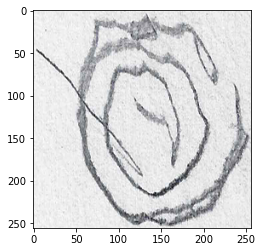

In [299]:
img_patient2=plt.imread("full/V04PE02.png")
plt.imshow(img_patient2)
print(img_patient2.std())

0.099725015

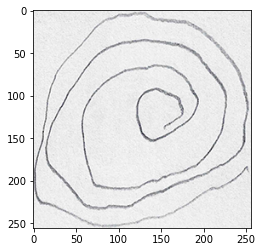

In [300]:
plt.imshow(img_patient)
img_patient.std()

0.08317724

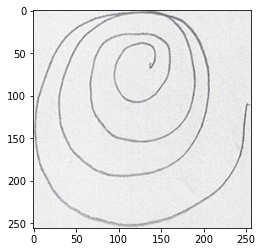

In [301]:
plt.imshow(img_healthy)
img_healthy.std()

## check the correlation of std of matrix with healthy/unhealthy

## check the correlation of number of point with healthy/unhealthy

In [302]:
from pathlib import Path
import pandas as pd
data_dir = Path(r'/Users/apple/Desktop/SAPintern/archive/spiral/')
draw_df = pd.DataFrame({'path': list(data_dir.glob('*/*/*.png'))})
draw_df['img_id'] = draw_df['path'].map(lambda x: x.stem)
draw_df['disease'] = draw_df['path'].map(lambda x: x.parent.stem)
draw_df['validation'] = draw_df['path'].map(lambda x: x.parent.parent.stem)
draw_df.sample(5)

,path,img_id,disease,validation
61,/Users/apple/Desktop/SAPintern/archive/spiral/...,V03PE08,parkinson,training
5,/Users/apple/Desktop/SAPintern/archive/spiral/...,V55HE05,healthy,training
84,/Users/apple/Desktop/SAPintern/archive/spiral/...,V06HE01,healthy,testing
4,/Users/apple/Desktop/SAPintern/archive/spiral/...,V55HE11,healthy,training
89,/Users/apple/Desktop/SAPintern/archive/spiral/...,V11PE03,parkinson,testing


### feature 1: hists on x-axis and y_asix

In [303]:
draw_df["corr"] = np.nan
draw_df["chi"] = np.nan
draw_df["inter"] = np.nan
draw_df["bar"] = np.nan
draw_df["hell"] = np.nan
draw_df["chi_alt"] = np.nan

In [304]:
corr_list=[]
inter_list=[]
bar_list=[]
chi_list=[]

for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]),cv2.IMREAD_GRAYSCALE)
    ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
    median=cv2.medianBlur(thresh,3)
    G_X = cv2.reduce(thresh, 0 ,cv2.REDUCE_SUM,dtype=cv2.CV_32F) #32F或者两个都改都可以
    G_Y = cv2.reduce(thresh, 1 ,cv2.REDUCE_SUM,dtype=cv2.CV_32F)
    hist1=cv2.calcHist([G_X],[0],None,[65536],[0,65535])
    hist2=cv2.calcHist([G_Y],[0],None,[65536],[0,65535])
    #temp_corr_list.append(cv2.compareHist(hist1,hist2,0))
    #temp_chi_list.append(cv2.compareHist(hist1,hist2,1))
    #temp_inter_list.append(cv2.compareHist(hist1,hist2,2))
    #temp_bar_list.append(cv2.compareHist(hist1,hist2,3))
    draw_df.iloc[j,4]=cv2.compareHist(hist1,hist2,0)
    draw_df.iloc[j,5]=cv2.compareHist(hist1,hist2,1)
    draw_df.iloc[j,6]=cv2.compareHist(hist1,hist2,2)
    draw_df.iloc[j,7]=cv2.compareHist(hist1,hist2,3)
    draw_df.iloc[j,8]=cv2.compareHist(hist1,hist2,4)
    draw_df.iloc[j,9]=cv2.compareHist(hist1,hist2,5)
    #draw_df.iloc[j,10]=cv2.compareHist(hist1,hist2,6)
    #corr_list.append(temp_corr_list)
    #inter_list.append(temp_inter_list)
    #bar_list.append(temp_bar_list)
    #chi_list.append(temp_chi_list)

### feature 2

In [305]:
draw_df["mean"] = np.nan
draw_df["median"] = np.nan
draw_df["range"] = np.nan
draw_df["std"] = np.nan
draw_df["skew"] = np.nan
draw_df["kur"] = np.nan

In [306]:
from scipy.stats import skew,kurtosis
healthy=None
parkinson=None
counter=1
for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]),cv2.IMREAD_GRAYSCALE)
    ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
    median=cv2.medianBlur(thresh,3)
    sum_bycolumn=np.sum(median, axis=1) # sum by column
    sum_byrow=np.sum(median, axis=0) # sum by row
    #print(sum_bycolumn.shape)
    #print(sum_byrow.shape)
    series=np.hstack((sum_byrow,sum_bycolumn))
    series=series.reshape((1,-1))
   # print(series[0].shape)
    draw_df.iloc[j,10]=np.mean(series[0])
    draw_df.iloc[j,11]=np.median(series[0])
    draw_df.iloc[j,12]=np.ptp(series[0])
    draw_df.iloc[j,13]=np.std(series[0])
    draw_df.iloc[j,14]=skew(series[0])
    draw_df.iloc[j,15]=kurtosis(series[0])
    
    if draw_df.iloc[j,2] =='healthy':
        if healthy is None:
            healthy=series[0]
        else:
            healthy=np.hstack((healthy,series[0]))
    else:
        if parkinson is None:
            parkinson=series[0]
        else:
            parkinson=np.hstack((healthy,series[0]))
   # print(counter)
    counter+=1
healthy=healthy.reshape((1,-1))
parkinson=parkinson.reshape((1,-1))

### feature 3

In [307]:
draw_df["h_dis"] = np.nan
draw_df["v_dis"] = np.nan
draw_df["asym"] = np.nan

In [308]:
for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]),cv2.IMREAD_GRAYSCALE)
    ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
    median=cv2.medianBlur(thresh,3)
    M = cv2.moments(median)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    left_x=np.amin(np.argwhere(median>0),axis=0)[0] # leftmost x
    right_x=np.amax(np.argwhere(median>0),axis=0)[0] # rightmost x
    up_y=np.amin(np.argwhere(median>0),axis=0)[1] # up y
    btm_y=np.amax(np.argwhere(median>0),axis=0)[1] # bottom y
    
    draw_df.iloc[j,16]=abs((cY-up_y)-(btm_y-cY))/(btm_y-up_y)
    draw_df.iloc[j,17]=abs((cX-left_x)-(right_x-cX))/(right_x-left_x)
    draw_df.iloc[j,18]=draw_df.iloc[j,16]+draw_df.iloc[j,17]

In [309]:
draw_df.columns

Index(['path', 'img_id', 'disease', 'validation', 'corr', 'chi', 'inter',
       'bar', 'hell', 'chi_alt', 'mean', 'median', 'range', 'std', 'skew',
       'kur', 'h_dis', 'v_dis', 'asym'],
      dtype='object')

### feature 4: brightness and color difference of image

In [310]:
draw_df["brightness"] = np.nan
draw_df["color_diff"] = np.nan

In [311]:
for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]))
    draw_df.iloc[j,19]=img.mean()
    draw_df.iloc[j,20]=img.std()

<Figure size 432x288 with 0 Axes>

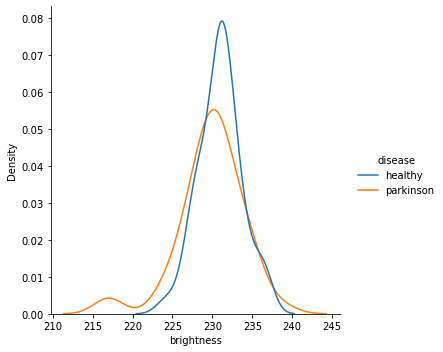

<Figure size 432x288 with 0 Axes>

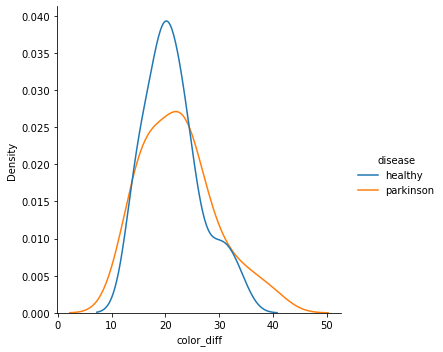

In [312]:
for i in ["brightness",'color_diff']:
    plt.clf()
    sns.displot(draw_df, x=i, hue="disease",kind="kde")
    plt.show()

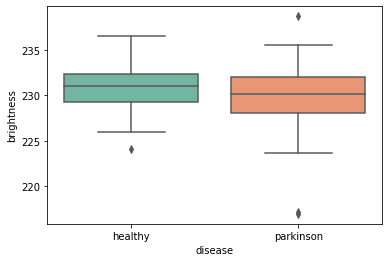

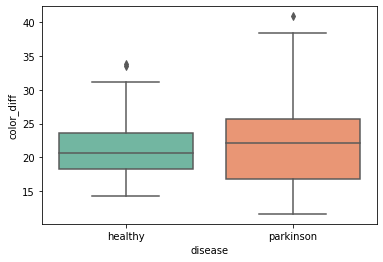

In [313]:
for i in ["brightness",'color_diff']:
    plt.clf()
    sns.boxplot(x='disease', y=i,data=draw_df, palette="Set2")
    plt.show()

#### summary:
Parkinson sprial has a higher brightness and a larger color difference compared to healthy ones.

### feature 5: number of circles in sprial

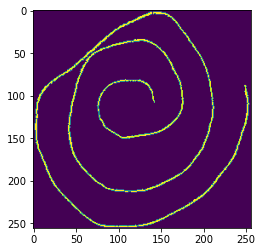

In [314]:
img=cv2.imread(str(draw_df.iloc[0,0]),cv2.IMREAD_GRAYSCALE)
ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
median=cv2.medianBlur(thresh,3)
plt.imshow(thresh)

array([  0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

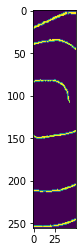

In [315]:
plt.imshow(thresh[:,100:150])
thresh[:,150]

In [316]:
median.shape

(256, 256)

In [317]:
median[:,150]

array([  0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [318]:
#input: 1d array with length=256
#output: number of lines
def count_points(matrix):
    count=0
    for i in range(len(matrix)):
        pixel = matrix[i]
        if i==0 and pixel>0: #the first pixel
            count+=1
        elif pixel>0 and matrix[i-1]==0:
            count+=1
    return count

In [319]:
range(median.shape[0])

range(0, 256)

In [320]:
#input: binary image
#output: horizontal nonzero points, vertical nonzero points
def count_line_cutpoint(img):
    horizon =[0]*img.shape[0]
    vertical =[0]*img.shape[1]
    for i in range(img.shape[0]):
        horizon[i]=count_points(img[i,:])
    for j in range(img.shape[1]):
        vertical[j]=count_points(img[:,j])
    return horizon,vertical

In [321]:
draw_df["num_circles"] = np.nan
draw_df["cutpoints_mean"] = np.nan
draw_df["cutpoints_std"] = np.nan

In [322]:
for j in range(len(draw_df)):
    img=cv2.imread(str(draw_df.iloc[j,0]),cv2.IMREAD_GRAYSCALE)
    ret,thresh=cv2.threshold(img,200,255,cv2.THRESH_BINARY_INV)
    median=cv2.medianBlur(thresh,3)
    
    h_ma, v_ma = count_line_cutpoint(median)
    ma=np.hstack((h_ma, v_ma))
    draw_df.iloc[j,21]=max(max(h_ma),max(v_ma))//2 #num_of_circles
    draw_df.iloc[j,22]=ma.mean()
    draw_df.iloc[j,23]=ma.std()

<Figure size 432x288 with 0 Axes>

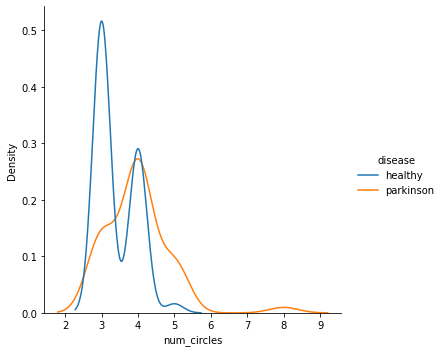

<Figure size 432x288 with 0 Axes>

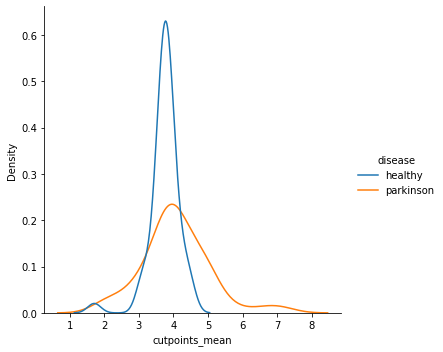

<Figure size 432x288 with 0 Axes>

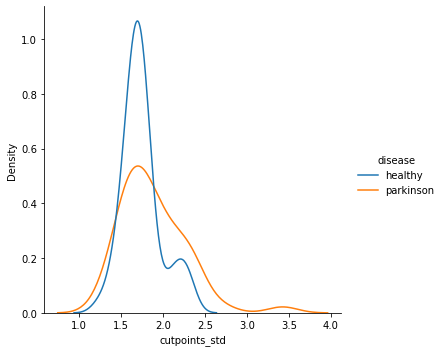

In [323]:
for i in ["num_circles","cutpoints_mean","cutpoints_std"]:
    plt.clf()
    sns.displot(draw_df, x=i, hue="disease",kind="kde")
    plt.show()

In [324]:
#healthy
print(draw_df[draw_df['disease']=='healthy']['num_circles'].mean())
print(draw_df[draw_df['disease']=='healthy']['num_circles'].median())

3.392156862745098
3.0


In [325]:
#parkinson
print(draw_df[draw_df['disease']=='parkinson']['num_circles'].mean())
print(draw_df[draw_df['disease']=='parkinson']['num_circles'].median())

3.980392156862745
4.0


### feature 6: thickness of the line
https://stackoverflow.com/questions/50967808/find-the-thickness-of-the-sealant-line-using-opencv